# 1. Project Goal

To run new campaign for promotion. The goal to attract current customers to increase their order QTY.

# 2. Problem solving

Explore customer insight then make customer segmentation for suitable type of appoaches and promotion

- Where do customers come from?
- Are they sastisfied with our products? Which factors affect to their review score?
- Which kind of payment method do they prefer the most?
- Which category of products do customers prefer the most (based on their review score)?
- Customer segmentation 

Base on the insight, we find the problem cause & suggest the solution for suitable promotion 

# 3. General information about dataset

**3.1 Dataset**

In this project, we use Data Olist E-commerce from Kaggle.

Data source: https://www.kaggle.com/olistbr/brazilian-ecommerce

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

**3.2 Approach to get dataset**

Create API Token in Kaggle to get data then use Python to collect necessary data for analysis.

Major information is about customers, review score, orders & payment method.

# 4. Loading dataset


In [ ]:
# Connect Colab & Kaggle
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oanhkieunguyen","key":"da070eca919de34285150bbaa84229e3"}'}

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Get link of dataset
!kaggle datasets download -d olistbr/brazilian-ecommerce

 96% 41.0M/42.6M [00:00<00:00, 61.5MB/s]
100% 42.6M/42.6M [00:00<00:00, 85.0MB/s]


In [ ]:
! unzip brazilian-ecommerce

Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


In [ ]:
path1 = '/content/olist_customers_dataset.csv'
path2 = '/content/olist_geolocation_dataset.csv'
path3 = '/content/olist_order_items_dataset.csv'
path4 = '/content/olist_order_payments_dataset.csv'
path5 = '/content/olist_order_reviews_dataset.csv'
path6 = '/content/olist_orders_dataset.csv'
path7 = '/content/olist_products_dataset.csv'
path8 = '/content/olist_sellers_dataset.csv'
path9 = '/content/product_category_name_translation.csv'

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

import matplotlib
import matplotlib.pyplot as plt
font = {'size' : 18}
matplotlib.rc('font', **font)

import seaborn as sns

%matplotlib inline
color = sns.color_palette()

In [ ]:
# Tạo df cho từng data
customer= pd.read_csv(path1)
geo_location= pd.read_csv(path2)
order_item = pd.read_csv(path3)
order_payment = pd.read_csv(path4)
order_review = pd.read_csv(path5)
orders= pd.read_csv(path6)
product = pd.read_csv(path7)
seller = pd.read_csv(path8)
category_name = pd.read_csv(path9)


In [ ]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# 5. Missing data checking

In [ ]:
df_names = ['customer','geo_location','order_item','order_payment','order_review','orders','product','seller','category_name']

In [ ]:
for df in df_names:
    print("Dataset {} has shape {}".format(df, eval(df).shape))

Dataset customer has shape (99441, 5)
Dataset geo_location has shape (1000163, 5)
Dataset order_item has shape (112650, 7)
Dataset order_payment has shape (103886, 5)
Dataset order_review has shape (99224, 7)
Dataset orders has shape (99441, 8)
Dataset product has shape (32951, 9)
Dataset seller has shape (3095, 4)
Dataset category_name has shape (71, 2)


In [ ]:
# Lets check the null values:

for df in df_names:
    print("{}: {} null values".format(df, eval(df).isnull().sum().sum()))

customer: 0 null values
geo_location: 0 null values
order_item: 0 null values
order_payment: 0 null values
order_review: 145903 null values
orders: 4908 null values
product: 2448 null values
seller: 0 null values
category_name: 0 null values


We can see that there are 3 datasets having null value: review, orders & product. Lets take a look over these tables

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

All null colums are about timestamp (approved time, delivered carrier & delivered customer date). These 3 timestamps are always created after purchase time, maybe had not updated for all data or not yet proceeded. We consider to fill na with purchase timestamp for order_approved at & order_delivered_carrier_date.

For order_delivered_customer_date, we assume it is the same with estimated delivery date

In [ ]:
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna(orders['order_approved_at'])
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(orders['order_estimated_delivery_date'])

In [ ]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Check null for product dataset
product.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
# We check 2 rows having null first
product[product['product_weight_g'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's all about dimension and product_id, but may customer buy this kind of product so we replacec null with "No info"

In [ ]:
# product = product[~(product['product_name_lenght'].isnull())] --> ko drop mà replace
product['product_name_lenght'] = product['product_name_lenght'].fillna('No info')
product['product_category_name'] = product['product_category_name'].fillna('No info')
product['product_description_lenght'] = product['product_description_lenght'].fillna('No info')
product['product_photos_qty'] = product['product_photos_qty'].fillna('No info')
product['product_weight_g'] = product['product_weight_g'].fillna('No info')
product['product_length_cm'] = product['product_length_cm'].fillna('No info')
product['product_height_cm'] = product['product_height_cm'].fillna('No info')
product['product_width_cm'] = product['product_width_cm'].fillna('No info')

In [ ]:
product.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
# Check review dataset
order_review.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
print('Missing rate for comment_title is {}%'.format(round(order_review['review_comment_title'].isnull().sum()/len(order_review) * 100,2)))

Missing rate for comment_title is 88.34%


In [ ]:
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Mostly do not focus on comment title, so we drop this column

In [ ]:
order_review = order_review.drop(['review_comment_title'],axis = 1)

In [ ]:
# Fill null in review_comment_message with None
order_review['review_comment_message'] = order_review['review_comment_message'].fillna('None')

In [ ]:
order_review.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Now we handled all missing value

In [ ]:
# Merge data for 1 unique datadet
df = pd.merge(orders,order_payment, on='order_id')
df = pd.merge(df, customer, on='customer_id')
df = pd.merge(df,order_item, on='order_id')
df = pd.merge(df, seller, on='seller_id')
df = pd.merge(df, order_review, on='order_id')
df = pd.merge(df, product, on='product_id')
df = pd.merge(df, category_name, on='product_category_name')

df.shape

(115609, 39)

In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [ ]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
review_id                        0
review_score                     0
review_comment_message           0
review_creation_date

We only keep necessary columns for furhter analysis

In [ ]:
df_data = df[['order_id','order_item_id','customer_id','customer_unique_id','order_status','product_id','product_category_name_english','review_score','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date','payment_type','payment_installments','payment_value','price','customer_city','customer_state']]
df_data.head()

,order_id,order_item_id,customer_id,customer_unique_id,order_status,product_id,product_category_name_english,review_score,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,price,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,1,18.12,29.99,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,1,2.00,29.99,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,1,18.59,29.99,sao paulo,SP
3,128e10d95713541c87cd1a2e48201934,1,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28 00:00:00,credit_card,3,37.77,29.99,sao paulo,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,1,26c7ac168e1433912a51b924fbd34d34,ef0996a1a279c26e7ecbd737be23d235,delivered,87285b34884572647811a353c7ac498a,housewares,5,2017-08-02 18:24:47,2017-08-07 18:30:01,2017-08-15 00:00:00,credit_card,1,37.77,29.99,sao paulo,SP


# 6. EDA

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   order_item_id                  115609 non-null  int64  
 2   customer_id                    115609 non-null  object 
 3   customer_unique_id             115609 non-null  object 
 4   order_status                   115609 non-null  object 
 5   product_id                     115609 non-null  object 
 6   product_category_name_english  115609 non-null  object 
 7   review_score                   115609 non-null  int64  
 8   order_purchase_timestamp       115609 non-null  object 
 9   order_delivered_customer_date  115609 non-null  object 
 10  order_estimated_delivery_date  115609 non-null  object 
 11  payment_type                   115609 non-null  object 
 12  payment_installments          

In [ ]:
df_data.describe(include='object').transpose()

,count,unique,top,freq
order_id,115609,96516,895ab968e7bb0d5659d16cd74cd1650c,63
customer_id,115609,96516,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,115609,93396,9a736b248f67d166d2fbb006bcb877c3,75
order_status,115609,7,delivered,113210
product_id,115609,32171,aca2eb7d00ea1a7b8ebd4e68314663af,533
product_category_name_english,115609,71,bed_bath_table,11847
order_purchase_timestamp,115609,95989,2017-08-08 20:26:31,63
order_delivered_customer_date,115609,94086,2017-08-14 12:46:18,63
order_estimated_delivery_date,115609,449,2017-12-20 00:00:00,649
payment_type,115609,4,credit_card,85278


In [ ]:
df_data.describe()

,order_item_id,review_score,payment_installments,payment_value,price
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,1.194535,4.034409,2.946233,172.387379,120.619850
std,0.685926,1.385584,2.781087,265.873969,182.653476
min,1.000000,1.000000,0.000000,0.000000,0.850000
25%,1.000000,4.000000,1.000000,60.870000,39.900000
50%,1.000000,5.000000,2.000000,108.050000,74.900000
75%,1.000000,5.000000,4.000000,189.480000,134.900000
max,21.000000,5.000000,24.000000,13664.080000,6735.000000


Payment_value is always higher than Price as Payment_value includes Price + Freight

Payment_value = 0 when customer had not received shipment

In [ ]:
df_data.groupby(['order_status'])['order_status'].count()

order_status
approved            3
canceled          536
delivered      113210
invoiced          358
processing        357
shipped          1138
unavailable         7
Name: order_status, dtype: int64

In [ ]:
# Rate of canceled order 
canceled_order_rate = round(len(df_data[df_data.order_status.isin(['canceled','unavailable'])])/len(df_data)*100,2)
print('Missing rate for calceled & unavailable orders is {}%'.format(canceled_order_rate))

Missing rate for calceled & unavailable orders is 0.47%


The canceled rate is very low, we keep that for further analysis

In [ ]:
len(df_data[df_data.order_status.isin(['canceled','unavailable'])])

543

## **Where do customers come from?**

In [ ]:
# Customer có doanh thu phân bổ theo state như thế nào?
Sale_by_state = df_data.groupby('customer_state')['price'].sum().sort_values(ascending=False)
Sale_by_state.head()

customer_state
SP    5367501.02
RJ    1867476.60
MG    1610763.39
RS     779370.93
PR     697620.83
Name: price, dtype: float64

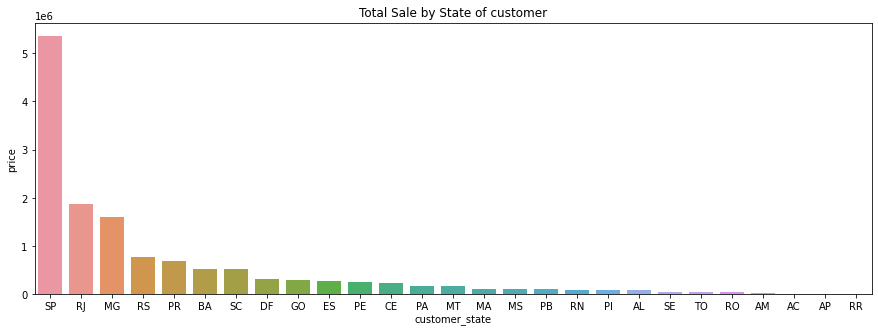

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Total Sale by State of customer')
sns.barplot(data= df_data, x=Sale_by_state.index, y=Sale_by_state)

In [ ]:
# Customer có số orders phân bổ theo state như thế nào?
Order_by_state = df_data.groupby('customer_state')['order_id'].count().sort_values(ascending=False)
Order_by_state.head()

customer_state
SP    48797
RJ    14987
MG    13429
RS     6413
PR     5879
Name: order_id, dtype: int64

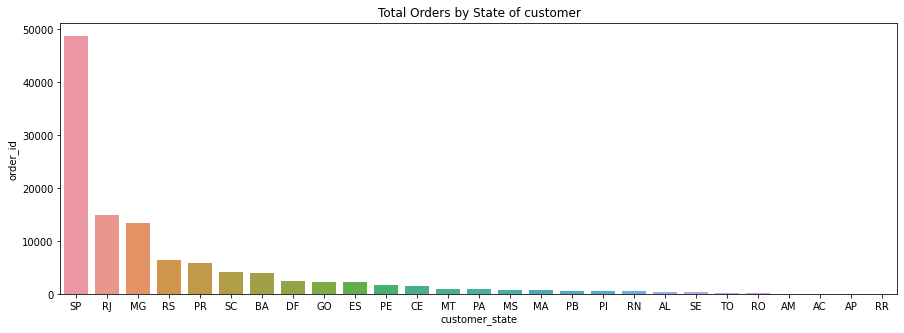

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Total Orders by State of customer')
sns.barplot(data= df_data, x=Order_by_state.index, y=Order_by_state)

We can see that SP (Sao Paulo), RJ (Rio de Janeiro), MG (Minas Gerais) have highest total sale value and total orders as well

These are 3 largest population in Brazil.

## **Are they sastisfied with our products? (By checking review score)**

In [ ]:
Review_score = df_data.review_score.value_counts()
Review_score.head()

5    65374
4    21951
1    14546
3     9718
2     4020
Name: review_score, dtype: int64

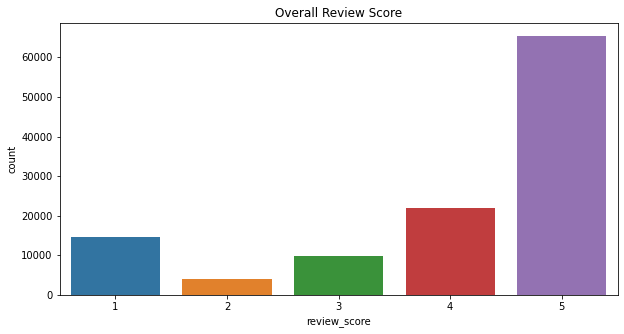

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Overall Review Score')
sns.countplot(x='review_score', data= df_data)

Mostly customers have good review with 5 score, a bit with 4 score and small part review with 1, 2, 3 score.

We will check:
- Check deeper about delivery time to find if any delay affect to review_score which we can extract from this data (others such as quality of product or customer service do not show on this data, may just be explored a bit in comment)

## **Relations between Delivery time & review score**

In [ ]:
# Convert dat column to Dates
DateColumns = ['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date']

for column in DateColumns:
  df_data[column] = pd.to_datetime(df_data[column], errors = 'coerce').dt.date

# Calculate the difference between estimated date & delivery date = delay time (Positive value mean delay)
df_data['Diff_Delivery_Days'] = ((df_data['order_delivered_customer_date']- df_data['order_estimated_delivery_date']).dt.days)

# Calculate the difference between purchase & deliveried date
df_data['Delivery_Count_day'] = ((df_data['order_delivered_customer_date']-df_data['order_purchase_timestamp']).dt.days)

In [ ]:
df_data[['order_estimated_delivery_date','order_delivered_customer_date','Diff_Delivery_Days','order_purchase_timestamp','Delivery_Count_day']]

,order_estimated_delivery_date,order_delivered_customer_date,Diff_Delivery_Days,order_purchase_timestamp,Delivery_Count_day
0,2017-10-18,2017-10-10,-8,2017-10-02,8
1,2017-10-18,2017-10-10,-8,2017-10-02,8
2,2017-10-18,2017-10-10,-8,2017-10-02,8
3,2017-08-28,2017-08-18,-10,2017-08-15,3
4,2017-08-15,2017-08-07,-8,2017-08-02,5
...,...,...,...,...,...
115604,2018-07-20,2018-07-20,0,2018-07-11,9
115605,2018-05-28,2018-05-21,-7,2018-05-16,5
115606,2018-06-28,2018-06-16,-12,2018-06-13,3
115607,2018-09-04,2018-08-22,-13,2018-08-07,15


In [ ]:
df_data.head()

,order_id,order_item_id,customer_id,customer_unique_id,order_status,product_id,product_category_name_english,review_score,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,price,customer_city,customer_state,Diff_Delivery_Days,Delivery_Count_day
0,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02,2017-10-10,2017-10-18,credit_card,1,18.12,29.99,sao paulo,SP,-8,8
1,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02,2017-10-10,2017-10-18,voucher,1,2.00,29.99,sao paulo,SP,-8,8
2,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02,2017-10-10,2017-10-18,voucher,1,18.59,29.99,sao paulo,SP,-8,8
3,128e10d95713541c87cd1a2e48201934,1,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-08-15,2017-08-18,2017-08-28,credit_card,3,37.77,29.99,sao paulo,SP,-10,3
4,0e7e841ddf8f8f2de2bad69267ecfbcf,1,26c7ac168e1433912a51b924fbd34d34,ef0996a1a279c26e7ecbd737be23d235,delivered,87285b34884572647811a353c7ac498a,housewares,5,2017-08-02,2017-08-07,2017-08-15,credit_card,1,37.77,29.99,sao paulo,SP,-8,5


In [ ]:
print('Average review score for delay shipment:',(df_data[df_data['Diff_Delivery_Days']>0]['review_score'].mean()))
print('Average review score for anticipated shipment:',(df_data[df_data['Diff_Delivery_Days']<=0]['review_score'].mean()))

Average review score for delay shipment: 2.2555540223540778
Average review score for anticipated shipment: 4.153374799283882


We can see clearly that delay shipment has low score

Now we check the correlation between (Diff_Delivery_Days and Delivery_Count_Days) and review_score

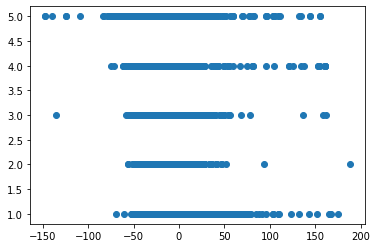

In [ ]:
plt.scatter(x=df_data['Diff_Delivery_Days'], y=df_data['review_score'])

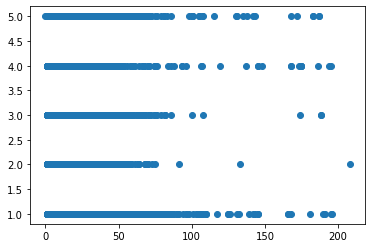

In [ ]:
plt.scatter(x=df_data['Delivery_Count_day'], y=df_data['review_score'])

We can see that there is no clear correlation between delivery time and review score, but the average score for anticipated shipment is higher and delayed shipment is lower.

Hence, we can assume that shipment which has long delivery time are still got good score and shipment has shorter delivery time can be got lower score.

We also see the max delivery day and delayed days are to much (up to 200 days). We will check more about that

In [ ]:
df_cat=df_data.groupby('product_category_name_english')['review_score','Delivery_Count_day'].mean()
df_cat.shape

(71, 2)

There are total 71 categories of products

In [ ]:
df_loc = df_data[df_data['Delivery_Count_day']>50]
df_loc.shape


(784, 19)

We have 784 orders per total 115,609 orders in our dataset has delivery_count_day > 50. It is a small part then we will check it belong to which category

In [ ]:
df_loc1 = df_loc.groupby('product_category_name_english').mean()['Delivery_Count_day'].reset_index()

In [ ]:
df_loc1.shape

(46, 2)

In [ ]:
df_loc1.head(46)

,product_category_name_english,Delivery_Count_day
0,agro_industry_and_commerce,52.000000
1,air_conditioning,55.000000
2,audio,53.000000
3,auto,71.558140
4,baby,71.454545
5,bed_bath_table,62.731959
6,books_general_interest,57.500000
7,books_technical,65.000000
8,christmas_supplies,70.000000
9,computers,60.500000


In [ ]:
df_loc = df_data[df_data['Diff_Delivery_Days']>50]
df_loc.shape

(115, 19)

In [ ]:
df_loc2 = df_loc.groupby('product_category_name_english').mean()['Diff_Delivery_Days'].reset_index()

In [ ]:
df_loc2.shape

(27, 2)

In [ ]:
df_loc2.head(27)

,product_category_name_english,Diff_Delivery_Days
0,auto,91.500000
1,baby,76.800000
2,bed_bath_table,81.000000
3,computers_accessories,94.571429
4,consoles_games,165.000000
5,construction_tools_construction,70.000000
6,cool_stuff,109.400000
7,electronics,73.666667
8,fashion_bags_accessories,58.000000
9,food,77.333333


In [ ]:
top_10_long_delivery = df_loc1.sort_values('Delivery_Count_day', ascending=False).nlargest(10,'Delivery_Count_day')
top_10_delay = df_loc2.sort_values('Diff_Delivery_Days', ascending=False).nlargest(10,'Diff_Delivery_Days')

Text(0, 0.5, 'Product_categry_name')

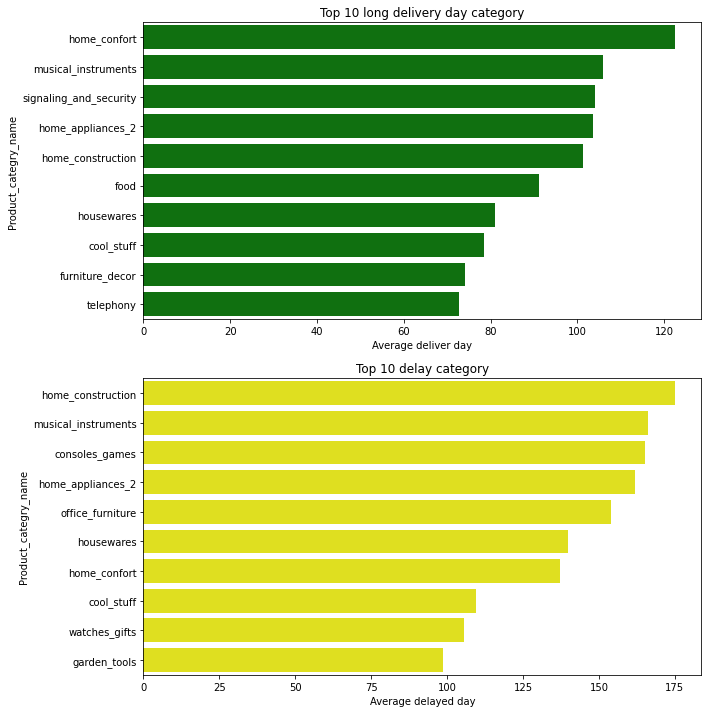

In [ ]:
plt.figure(figsize=(10,12))

plt.subplot(211)
sns.barplot(data=top_10_long_delivery,x='Delivery_Count_day', y='product_category_name_english', color='green')
plt.title('Top 10 long delivery day category')
plt.xlabel('Average deliver day')
plt.ylabel('Product_categry_name')

plt.subplot(212)
sns.barplot(data=top_10_delay,x='Diff_Delivery_Days', y='product_category_name_english', color='yellow')
plt.title('Top 10 delay category')
plt.xlabel('Average delayed day')
plt.ylabel('Product_categry_name')

Top of these long delivery days are home_confort, musical_instrument, signaling & security, home appliance and construction. Maybe these kind of products need to be ordered in advanced then production (or import) so take long time.

One another reason is the distance of the seller and customer (In other analysis about product_freight), the max is 8,678km and average distance is about 602km.

Most of delayed category are belong to products which have long delivery day. Home_construction, musical_instruments, consoles_games, home_appliances, home_funiture.... are also the product which need to ordered in advanced then production. Therefore, probability of delayed production or shipping time is higher.

(array([2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        5.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00, 5.0000e+00,
        1.0000e+01, 8.0000e+00, 4.0000e+01, 7.1000e+01, 9.9000e+01,
        1.6200e+02, 3.5900e+02, 3.1400e+02, 8.5100e+02, 1.4460e+03,
        2.4970e+03, 3.3430e+03, 1.0614e+04, 1.1003e+04, 1.9344e+04,
        2.3143e+04, 1.6716e+04, 1.1046e+04, 7.2650e+03, 2.1120e+03,
        1.9940e+03, 8.4300e+02, 5.7700e+02, 5.8600e+02, 2.7700e+02,
        2.0500e+02, 1.7800e+02, 1.1600e+02, 6.7000e+01, 6.3000e+01,
        2.7000e+01, 3.4000e+01, 2.1000e+01, 3.2000e+01, 1.0000e+01,
        1.6000e+01, 9.0000e+00, 3.0000e+00, 5.0000e+00, 5.0000e+00,
        4.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 5.0000e+00, 0.00

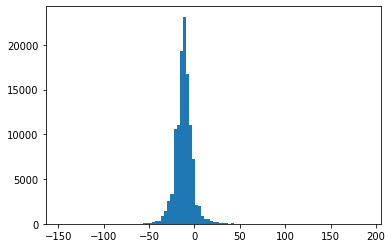

In [ ]:
plt.hist(df_data['Diff_Delivery_Days'], bins=100)

(array([4.1570e+03, 9.3800e+03, 1.3951e+04, 1.7169e+04, 1.4244e+04,
        1.2165e+04, 1.0258e+04, 7.3390e+03, 5.6770e+03, 4.5860e+03,
        3.6350e+03, 2.7010e+03, 2.9340e+03, 1.5060e+03, 1.0460e+03,
        8.6700e+02, 7.7600e+02, 5.6000e+02, 4.3500e+02, 3.6500e+02,
        3.2400e+02, 2.8100e+02, 2.3300e+02, 1.5600e+02, 1.5300e+02,
        1.6700e+02, 9.0000e+01, 6.4000e+01, 5.2000e+01, 3.5000e+01,
        3.1000e+01, 3.1000e+01, 2.7000e+01, 3.2000e+01, 2.4000e+01,
        7.0000e+00, 1.8000e+01, 1.1000e+01, 1.0000e+01, 7.0000e+00,
        1.1000e+01, 7.0000e+00, 2.0000e+00, 4.0000e+00, 2.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 5.0000e+00, 1.0000e+00,
        7.0000e+00, 6.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00, 4.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

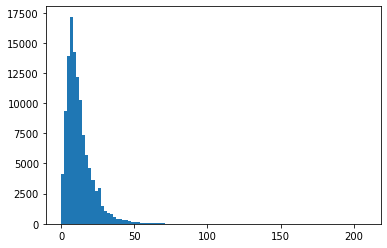

In [ ]:
plt.hist(df_data['Delivery_Count_day'], bins=100)

We remove outliers to see more clearly

(array([  275.,   314.,   851.,  1006.,  1971.,  3045.,  4978., 10160.,
        12371., 21683., 16176., 16716.,  9024.,  5419.,  5413.,  1563.,
         1377.,   658.,   575.,   475.]),
 array([-42., -39., -36., -33., -30., -27., -24., -21., -18., -15., -12.,
         -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.,  18.]),
 <a list of 20 Patch objects>)

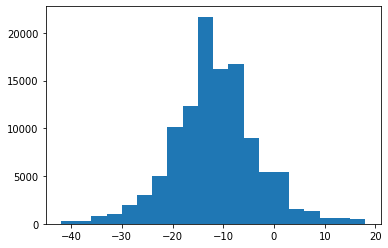

In [ ]:
x = df_data.Diff_Delivery_Days
mu=x.mean()
sigma= x.std()
z_score=(x-mu)/sigma
df_no_outlier_delay = df_data[abs(z_score)<=3]
df_no_outlier_delay.shape
plt.hist(df_no_outlier_delay['Diff_Delivery_Days'], bins=20, alpha=1)

(array([ 4157.,  9380., 13951., 17169., 14244., 12165., 10258.,  7339.,
         5677.,  4586.,  3635.,  2701.,  2086.,  1662.,  1237.,   958.,
          799.,   704.,   447.,   596.]),
 array([ 0.  ,  2.05,  4.1 ,  6.15,  8.2 , 10.25, 12.3 , 14.35, 16.4 ,
        18.45, 20.5 , 22.55, 24.6 , 26.65, 28.7 , 30.75, 32.8 , 34.85,
        36.9 , 38.95, 41.  ]),
 <a list of 20 Patch objects>)

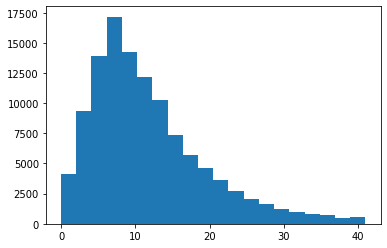

In [ ]:
x = df_data.Delivery_Count_day
mu=x.mean()
sigma= x.std()
z_score=(x-mu)/sigma
df_no_outlier_delivery = df_data[abs(z_score)<=3]
df_no_outlier_delivery.shape
plt.hist(df_no_outlier_delivery['Delivery_Count_day'], bins=20, alpha=1)

After removing outliers, Delivery time from 10 - 40 days is still very long. This could be a problem as mostly delivery time is too long, need to find the reason (distance between seller and customer, or our system processing) then optimize logistics strategy and system.

## **Which category of products do customers prefer the most (based on their review score)?**

In [ ]:
df_data['product_category_name_english'].count()

115609

In [ ]:
product_review_mean = df_data.groupby(df_data.product_category_name_english).mean()['review_score'].reset_index()
product_review_mean.head()

,product_category_name_english,review_score
0,agro_industry_and_commerce,4.150794
1,air_conditioning,3.969697
2,art,3.935484
3,arts_and_craftmanship,4.125000
4,audio,3.840849


In [ ]:
score_5 = product_review_mean[product_review_mean['review_score']>4]
score_5.shape

(48, 2)

In [ ]:
score_5.head(48)

,product_category_name_english,review_score
0,agro_industry_and_commerce,4.150794
3,arts_and_craftmanship,4.125000
5,auto,4.064279
6,baby,4.011643
8,books_general_interest,4.438503
9,books_imported,4.419355
10,books_technical,4.375465
11,cds_dvds_musicals,4.642857
12,christmas_supplies,4.020270
13,cine_photo,4.216216


In [ ]:
top_10_rating = product_review_mean.sort_values('review_score', ascending=False).nlargest(10,'review_score')
low_10_rating = product_review_mean.sort_values('review_score', ascending=False).nsmallest(10,'review_score')

Text(0, 0.5, 'Product_categry_name')

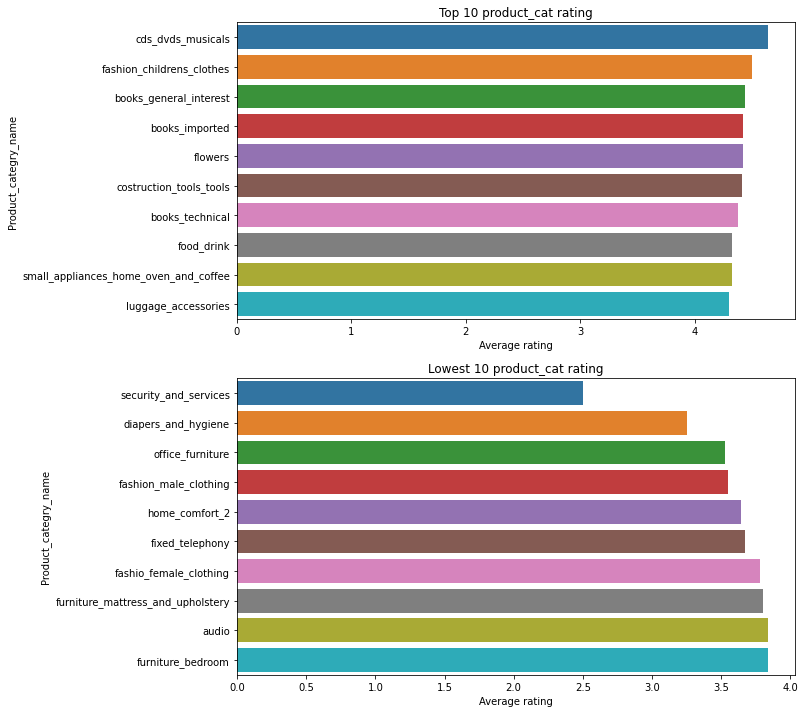

In [ ]:
plt.figure(figsize=(10,12))

plt.subplot(211)
sns.barplot(data=top_10_rating,x='review_score', y='product_category_name_english')
plt.title('Top 10 product_cat rating')
plt.xlabel('Average rating')
plt.ylabel('Product_categry_name')

plt.subplot(212)
sns.barplot(data=low_10_rating,x='review_score', y='product_category_name_english')
plt.title('Lowest 10 product_cat rating')
plt.xlabel('Average rating')
plt.ylabel('Product_categry_name')

CD, DVD musicals have highest review as this is things that is hard to get low score. People like that kind of music then buy it.
Fashion for children, book and flowers are the next top rating. We can expand range of products in these category to push sale along with benefit for frequency customer.

Securities and service have the lowest rating. This is about sevice fields, hard to buy online without any careful check. This kind of service need to pre test carefully before approval. Besides, office_funiture, home_confort and other funiture... get lowest score, as we analyse before, these kinds of products have long delivery time and may have long delay then it is easier to get lower score if it is out of their expectation.

## **Additional checking about qty & sale for references**

In [ ]:
df_data.head()

,order_id,order_item_id,customer_id,customer_unique_id,order_status,product_id,product_category_name_english,review_score,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,price,customer_city,customer_state,Diff_Delivery_Days,Delivery_Count_day
0,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02,2017-10-10,2017-10-18,credit_card,1,18.12,29.99,sao paulo,SP,-8,8
1,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02,2017-10-10,2017-10-18,voucher,1,2.00,29.99,sao paulo,SP,-8,8
2,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02,2017-10-10,2017-10-18,voucher,1,18.59,29.99,sao paulo,SP,-8,8
3,128e10d95713541c87cd1a2e48201934,1,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-08-15,2017-08-18,2017-08-28,credit_card,3,37.77,29.99,sao paulo,SP,-10,3
4,0e7e841ddf8f8f2de2bad69267ecfbcf,1,26c7ac168e1433912a51b924fbd34d34,ef0996a1a279c26e7ecbd737be23d235,delivered,87285b34884572647811a353c7ac498a,housewares,5,2017-08-02,2017-08-07,2017-08-15,credit_card,1,37.77,29.99,sao paulo,SP,-8,5


In [ ]:
df_data[df_data['order_id']=='e481f51cbdc54678b7cc49136f2d6af7']

,order_id,order_item_id,customer_id,customer_unique_id,order_status,product_id,product_category_name_english,review_score,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,price,customer_city,customer_state,Diff_Delivery_Days,Delivery_Count_day
0,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02,2017-10-10,2017-10-18,credit_card,1,18.12,29.99,sao paulo,SP,-8,8
1,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02,2017-10-10,2017-10-18,voucher,1,2.00,29.99,sao paulo,SP,-8,8
2,e481f51cbdc54678b7cc49136f2d6af7,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,87285b34884572647811a353c7ac498a,housewares,4,2017-10-02,2017-10-10,2017-10-18,voucher,1,18.59,29.99,sao paulo,SP,-8,8


In [ ]:
df_data[df_data['order_id']=='0008288aa423d2a3f00fcb17cd7d8719']

,order_id,order_item_id,customer_id,customer_unique_id,order_status,product_id,product_category_name_english,review_score,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,price,customer_city,customer_state,Diff_Delivery_Days,Delivery_Count_day
98480,0008288aa423d2a3f00fcb17cd7d8719,1,2355af7c75e7c98b43a87b2a7f210dc5,9e4159995424971423b98c4a8bc11529,delivered,368c6c730842d78016ad823897a372db,garden_tools,5,2018-02-13,2018-02-26,2018-03-06,boleto,1,126.54,49.9,jandira,SP,-8,13
98481,0008288aa423d2a3f00fcb17cd7d8719,2,2355af7c75e7c98b43a87b2a7f210dc5,9e4159995424971423b98c4a8bc11529,delivered,368c6c730842d78016ad823897a372db,garden_tools,5,2018-02-13,2018-02-26,2018-03-06,boleto,1,126.54,49.9,jandira,SP,-8,13


In [ ]:
df_data[df_data['order_id']=='0e7e841ddf8f8f2de2bad69267ecfbcf']	

,order_id,order_item_id,customer_id,customer_unique_id,order_status,product_id,product_category_name_english,review_score,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,price,customer_city,customer_state,Diff_Delivery_Days,Delivery_Count_day
4,0e7e841ddf8f8f2de2bad69267ecfbcf,1,26c7ac168e1433912a51b924fbd34d34,ef0996a1a279c26e7ecbd737be23d235,delivered,87285b34884572647811a353c7ac498a,housewares,5,2017-08-02,2017-08-07,2017-08-15,credit_card,1,37.77,29.99,sao paulo,SP,-8,5


In [ ]:
# Check sản phẩm bán chạy nhất
df_qty = df_data.groupby(df_data.product_category_name_english)['order_item_id'].count().reset_index()
df_qty.head()

,product_category_name_english,order_item_id
0,agro_industry_and_commerce,252
1,air_conditioning,297
2,art,217
3,arts_and_craftmanship,24
4,audio,377


In [ ]:
top_10_qty = df_qty.sort_values('order_item_id', ascending=False).nlargest(10,'order_item_id')
low_10_qty = df_qty.sort_values('order_item_id', ascending=False).nsmallest(10,'order_item_id')

Text(0, 0.5, 'Product_categry_name')

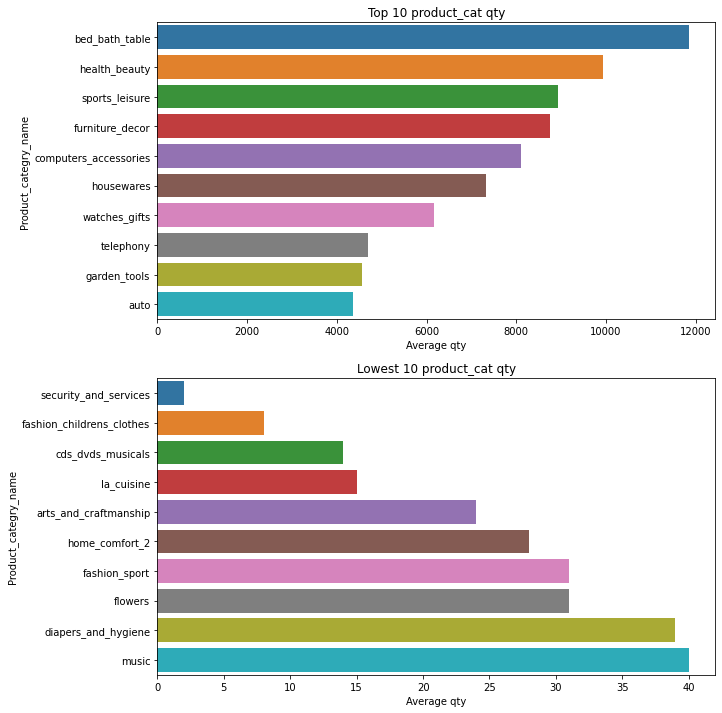

In [ ]:
plt.figure(figsize=(10,12))

plt.subplot(211)
sns.barplot(data=top_10_qty,x='order_item_id', y='product_category_name_english')
plt.title('Top 10 product_cat qty')
plt.xlabel('Average qty')
plt.ylabel('Product_categry_name')

plt.subplot(212)
sns.barplot(data=low_10_qty,x='order_item_id', y='product_category_name_english')
plt.title('Lowest 10 product_cat qty')
plt.xlabel('Average qty')
plt.ylabel('Product_categry_name')

In [ ]:
df_sale = df_data.groupby(df_data.product_category_name_english).sum()['price'].sort_values(ascending=False).reset_index()
df_sale.shape

(71, 2)

In [ ]:
df_sale.head(71)

,product_category_name_english,price
0,health_beauty,1290883.52
1,watches_gifts,1245783.11
2,bed_bath_table,1095770.05
3,sports_leisure,1022489.29
4,computers_accessories,944992.54
...,...,...
66,flowers,1000.24
67,home_comfort_2,734.47
68,cds_dvds_musicals,730.00
69,fashion_childrens_clothes,569.85


In [ ]:
top_10_sale = df_sale.sort_values('price', ascending=False).nlargest(10,'price')
low_10_sale = df_sale.sort_values('price', ascending=False).nsmallest(10,'price')

Text(0, 0.5, 'Product_categry_name')

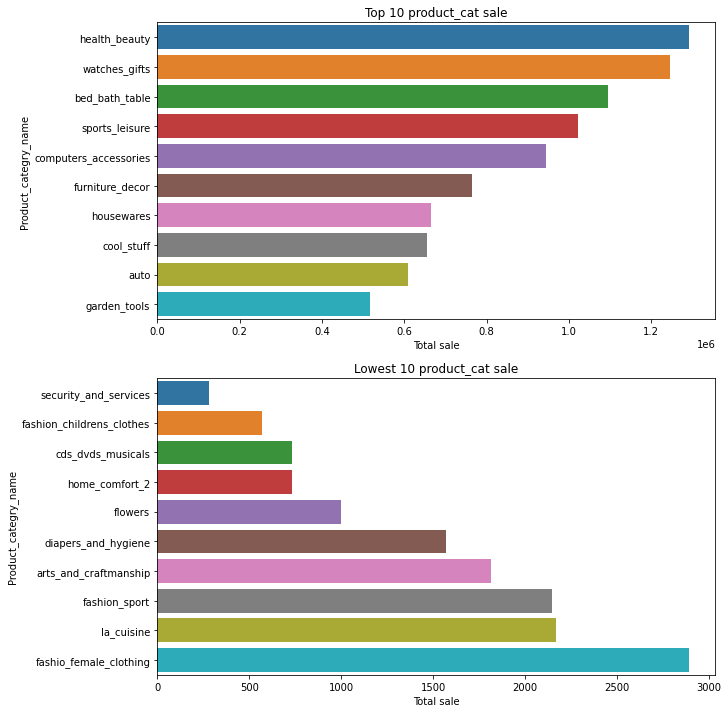

In [ ]:
plt.figure(figsize=(10,12))

plt.subplot(211)
sns.barplot(data=top_10_sale,x='price', y='product_category_name_english')
plt.title('Top 10 product_cat sale')
plt.xlabel('Total sale')
plt.ylabel('Product_categry_name')

plt.subplot(212)
sns.barplot(data=low_10_sale,x='price', y='product_category_name_english')
plt.title('Lowest 10 product_cat sale')
plt.xlabel('Total sale')
plt.ylabel('Product_categry_name')

In [ ]:
# Check sale in 2016-2018 period, used for next analysis
df_sale1= df_data.groupby(df_data.order_purchase_timestamp).sum()['price'].reset_index()
df_sale1.shape

(615, 2)

In [ ]:
df_sale1.head()

,order_purchase_timestamp,price
0,2016-09-04,72.89
1,2016-09-05,59.50
2,2016-10-02,100.00
3,2016-10-03,463.48
4,2016-10-04,10438.27


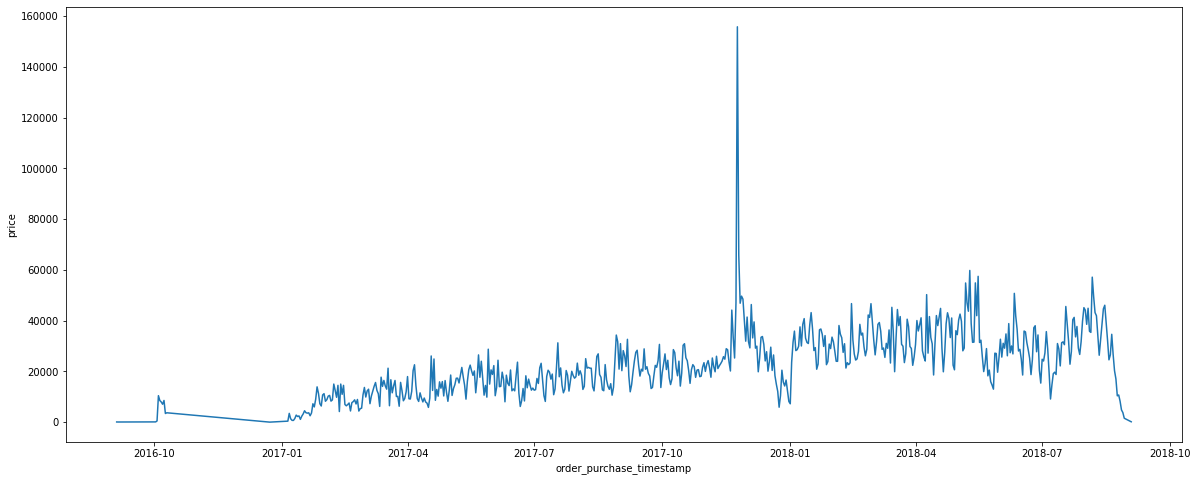

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x='order_purchase_timestamp', y='price', data= df_sale1
             )

## **Which payment method is the most popular?**

In [ ]:
payment_type = order_payment.groupby('payment_type',as_index=False)['order_id'].count().sort_values('order_id',ascending=False)
payment_type

,payment_type,order_id
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


Text(0.5, 1.0, 'Number of order by payment type')

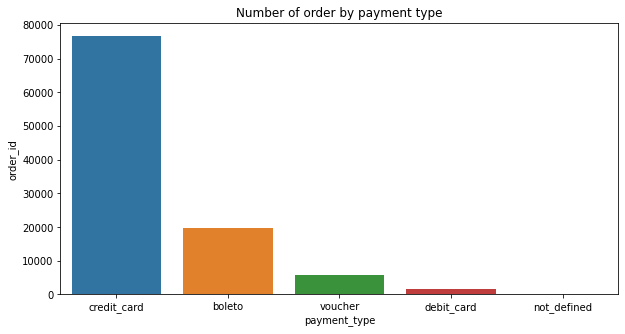

In [ ]:
fig, ax= plt.subplots(figsize=(10,5))
sns.barplot(x='payment_type', y='order_id', data=payment_type)
plt.title('Number of order by payment type')

Credit card has the most common payment method, next is boleto (a local popular payment method in Brazil). Therefore, we may need to expand the source of credit card with some collaboration with bank for promotion

# Customer Clustering

In [ ]:
df_data.groupby('customer_unique_id').agg({"order_id":"nunique",
                                           "order_purchase_timestamp":["min","max"],
                                           "price":"sum"}).reset_index()

customer_unique_id order_id  ... order_purchase_timestamp    price
                                         nunique  ...                      max      sum
0      0000366f3b9a7992bf8c76cfdf3221e2        1  ...               2018-05-10   129.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f        1  ...               2018-05-07    18.90
2      0000f46a3911fa3c0805444483337064        1  ...               2017-03-10    69.00
3      0000f6ccb0745a6a4b88665a16c9f078        1  ...               2017-10-12    25.99
4      0004aac84e0df4da2b147fca70cf8255        1  ...               2017-11-14   180.00
...                                 ...      ...  ...                      ...      ...
93391  fffcf5a5ff07b0908bd4e2dbc735a684        1  ...               2017-06-08  1570.00
93392  fffea47cd6d3cc0a88bd621562a9d061        1  ...               2017-12-10    64.89
93393  ffff371b4d645b6ecea244b27531430a        1  ...               2017-02-07    89.90
93394  ffff5962728ec6157033ef9805bacc48        1  ...               2018-05-02   115.00
93395  ffffd2657e2aad2907e67c3e9daecbeb        1  ...               2017-05-02    56.99

[93396 rows x 5 columns]

In [ ]:
last_order = orders.order_purchase_timestamp.max()
first_order = orders.order_purchase_timestamp.min()
print('Last order in dataset is',last_order)
print('First order in dataset is',first_order)

Last order in dataset is 2018-10-17 17:30:18
First order in dataset is 2016-09-04 21:15:19


In [ ]:
rfm = df_data.groupby('customer_unique_id').agg({"order_id":"nunique",
                                           "order_purchase_timestamp":["min","max"],
                                           "price":"sum"}).reset_index()
rfm.columns = ['customer_unique_id','frequency','first_order_date','last_order_date','monetary']

rfm['recency'] = [(dt.date(2018,10,17) - x).days for x in rfm['last_order_date']]

rfm.head()

,customer_unique_id,frequency,first_order_date,last_order_date,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10,2018-05-10,129.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07,2018-05-07,18.90,163
2,0000f46a3911fa3c0805444483337064,1,2017-03-10,2017-03-10,69.00,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12,2017-10-12,25.99,370
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14,2017-11-14,180.00,337


**Outlier checking**

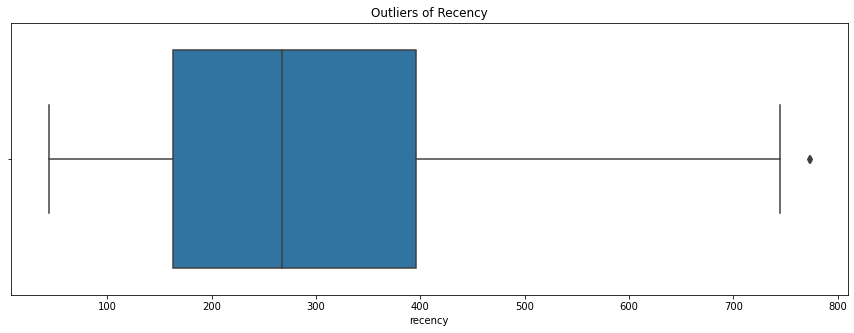

In [ ]:
# Recency outlier
plt.figure(figsize=(15,5))
plt.title('Outliers of Recency')
sns.boxplot(x=rfm.recency)

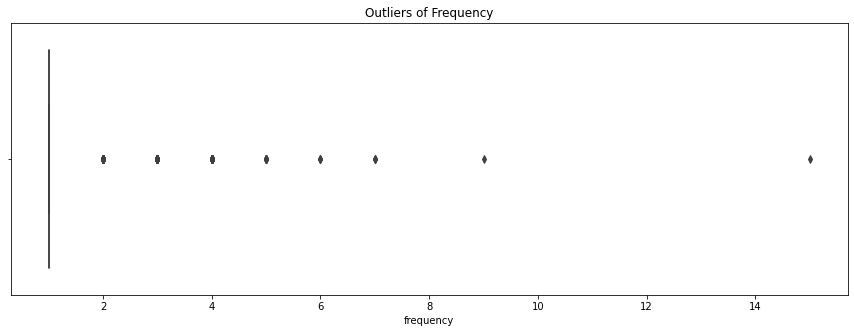

In [ ]:
# Frequency outlier
plt.figure(figsize=(15,5))
plt.title('Outliers of Frequency')
sns.boxplot(x=rfm.frequency)

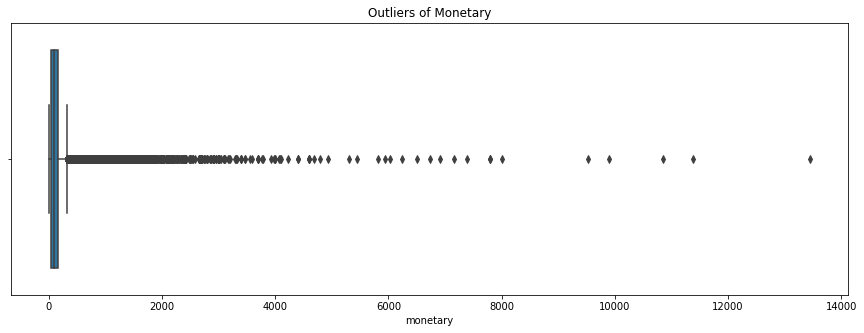

In [ ]:
# Monetary outlier
plt.figure(figsize=(15,5))
plt.title('Outliers of Monetary')
sns.boxplot(x=rfm.monetary)

Frequency & Monetary have outliers but we need to keep for segmentation for more accurate calulation.

**Customer segmentation using K-means**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm

In [ ]:
KS = list(range(2, 11))
print('Ks = ', KS)

Ks =  [2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# Extract RFM columns
train = rfm[['recency', 'frequency', 'monetary']]

# Scaling data
scaler = MinMaxScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)

**Elbow Method**

In [ ]:
for num_clusters in KS:
  # intialise Kmean
  kmeans= KMeans(n_clusters=num_clusters, max_iter=100)
  kmeans.fit(train_scaled)

  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg = silhouette_score(train_scaled, cluster_labels)
  print('For n_cluster={0}, the silhouette score is {1}'.format(num_clusters, silhouette_avg)) 

For n_cluster=2, the silhouette score is 0.5868863395166906
For n_cluster=3, the silhouette score is 0.5585162553498859
For n_cluster=4, the silhouette score is 0.529174169093592
For n_cluster=5, the silhouette score is 0.5236182599751069
For n_cluster=6, the silhouette score is 0.5125117171556572
For n_cluster=7, the silhouette score is 0.5088900240108251
For n_cluster=8, the silhouette score is 0.48714983255331923
For n_cluster=9, the silhouette score is 0.48410476016962106
For n_cluster=10, the silhouette score is 0.4818185667860472


In [ ]:
wssd = []
silhouette = []

for k in KS:
    model = KMeans(n_clusters=k).fit(train_scaled)

    # Calculate wssd
    wssd.append(model.inertia_ / len(train))

    # Calculate Silhoute
    cluster_labels = model.predict(train_scaled)
    silhouette.append(silhouette_score(train_scaled, cluster_labels))

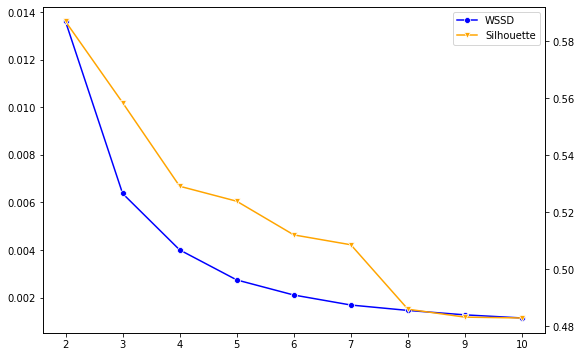

In [ ]:
plt.figure(figsize=(9, 6))
ax1 = sns.lineplot(
    x=KS, y=wssd, color='blue',
    marker='o',
    label='WSSD', legend=None
)
ax2 = ax1.twinx()
sns.lineplot(
    x=KS, y=silhouette, ax=ax2, color='orange',
    marker='v',
    label='Silhouette', legend=None
)

# Remove the grid
ax1.grid(False)
ax2.grid(False)

# Merge the legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=0)

**Final model**

In [ ]:
# Final model
n_clusters = 3
model = KMeans(n_clusters=n_clusters).fit(train_scaled)
cluster_labels = model.predict(train_scaled)
rfm['cluster'] = cluster_labels
rfm.head()

,customer_unique_id,frequency,first_order_date,last_order_date,monetary,recency,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10,2018-05-10,129.90,160,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07,2018-05-07,18.90,163,2
2,0000f46a3911fa3c0805444483337064,1,2017-03-10,2017-03-10,69.00,586,0
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12,2017-10-12,25.99,370,1
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14,2017-11-14,180.00,337,1


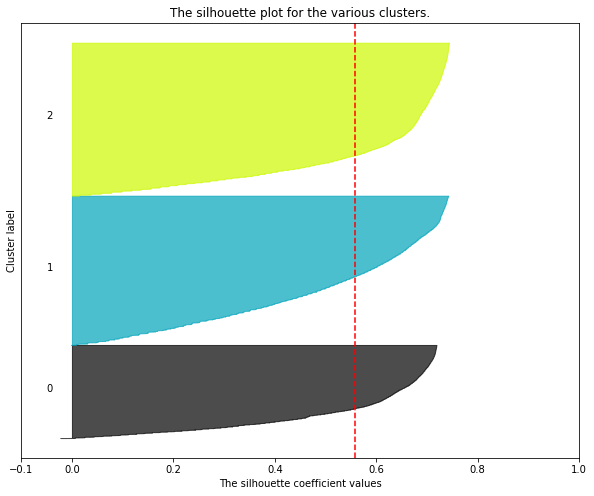

In [ ]:
silhouette_avg = silhouette_score(train_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(train_scaled, cluster_labels)

y_lower = 10
X = train_scaled

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 8)

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(rfm, x='recency', y='frequency', z='monetary',
              color='cluster')
fig.show()

We see mostly order frquency is 1, this is a problem need to be deep dived

Base on segmentation, we have 3 clusters with most frquency = 1 & have variety spent amount:
- Cluster 0: customers who haven't bought for very long time (over 1 year)
- Cluster 1: customers who haven't bought for long time (over six months)
- Cluster 2: customers who have just bought recenty (in 6 months)


In [ ]:
px.histogram(rfm,x=rfm['frequency'], title='Frequency of purchase',labels={'frequency':'Frequency'}, 
                   opacity=0.5, marginal='violin',
                   color_discrete_sequence=['red'])

In [ ]:
px.histogram(rfm,x=rfm['recency'], title='Recency of purchase')

In [ ]:
rfm['tenure'] = [(dt.date(2018,10,17) - x).days for x in rfm['first_order_date']]

In [ ]:
px.histogram(rfm, x=rfm['tenure'],title='Time from first purchase',
                   labels={'T':'Weeks'}, 
                   opacity=0.8, marginal='violin',
                   color_discrete_sequence=['indianred'])

# Conclusion

From the chart, we can see that most of customers have only 1 order in period of Sep 2016 to Oct 2018, so the recency and Tenure are very high. However, we always have stable sales during this period, showing that we always have new customers and not focus on current customers. 

Eventhough the review score is mostly high (5 score), customer only purchase once. We can propose the cause:

- The delivery time is long, they may find other source (competitor or the seller) for faster eventhough product quality is okay
- The competitor started up on the market with more advantage (system process or delivery time optimization) so they attract customers
- Life cycle of popular products is long: As we can see in top sale chart, top sale products are bed_bath_table, funiture doors, computers, housewares, telephony, garden tools... these are type of products that have long life cycle, cannot consume within 2 years while some products have 3-6 months to deliver

Back to our goal for promotion, I thought that we should recheck our advantages & current strategy of competitor before promotion campaign.

Base on segmentation, R (recency), F (frequency), M (monetary), we should focus on:
- Different promotion for each cluster: for example ask them about the stable quality then give voucher; cluster 1: increase impression & give voucher for coming back; cluster 2 can offer them a range of products which are related to their purchased products
- Run the voucher for credit card with various banks to attract customers